## Q-9 Agglomerative clustering
Implement Agglomerative hierarchical clustering algorithm using appropriate dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [3]:
df = pd.read_csv('CC_GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Dropping the CUST_ID column from the data
df =df.drop('CUST_ID', axis = 1)

In [6]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Handling the missing values
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mode()[0], inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11048\2460348469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_11048\2460348469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [8]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# Scaling the data so that all the features become comparable
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [10]:
# Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [11]:
# Converting the numpy array into a pandas
data_normalized = pd.DataFrame(df_normalized)

In [12]:
# Reducing the dimensionality of the Data
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1', 'P2']

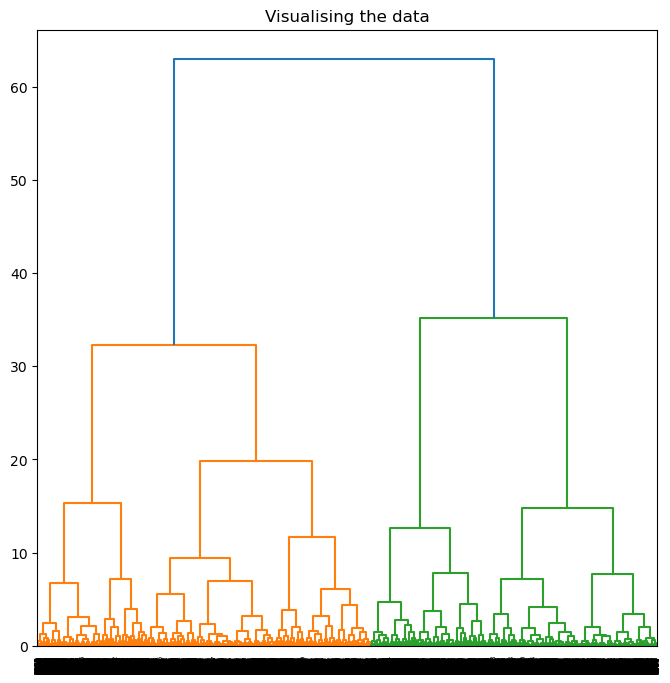

In [14]:
# Visualizing theworking of the Dendrograms
# Dendrograms are used to divide a given clusterinto many different clusters
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df_principal, method ='ward')))

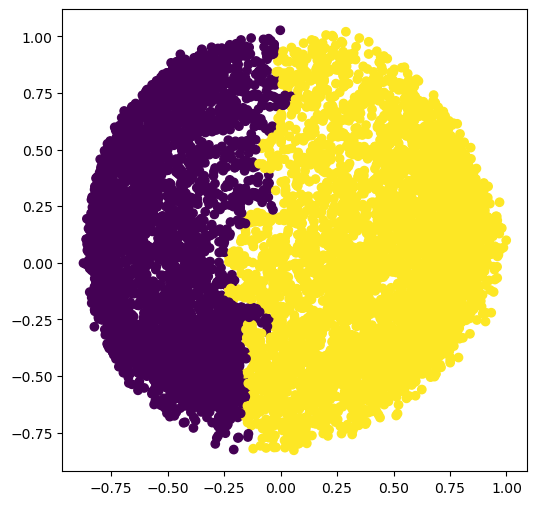

In [17]:
# Building and Visualizing the different clustering models for different values of k
# k = 2
ac2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['P1'], df_principal['P2'], c = ac2.fit_predict(df_principal))
plt.show()

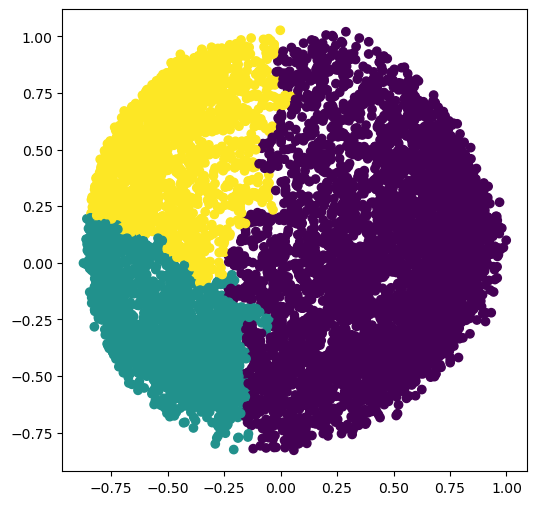

In [18]:
# k = 3
ac3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['P1'],df_principal['P2'], c = ac3.fit_predict(df_principal))
plt.show()

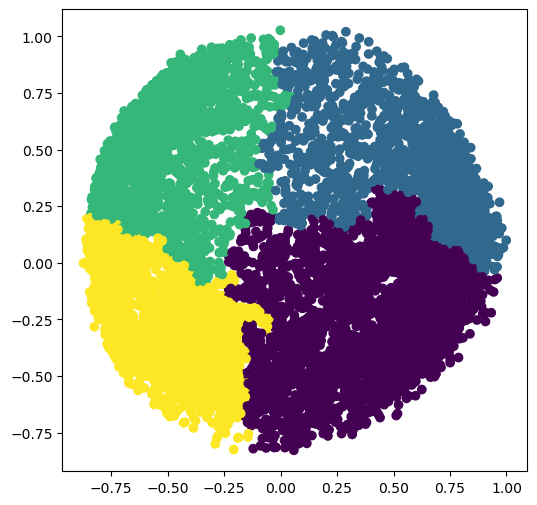

In [25]:
# k = 4
ac4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['P1'],df_principal['P2'], c = ac4.fit_predict(df_principal))
plt.show()

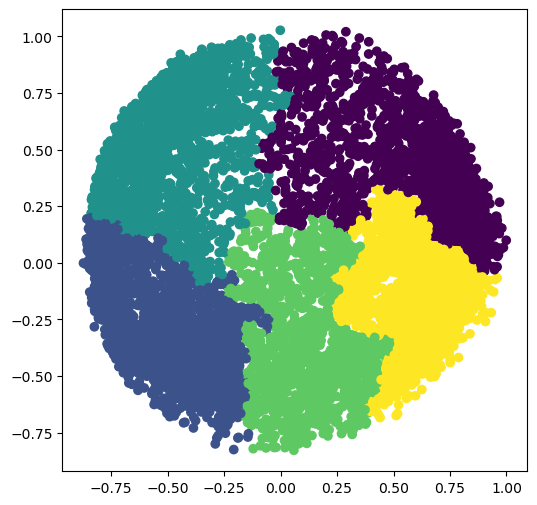

In [19]:
# k = 5
ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['P1'],df_principal['P2'], c = ac5.fit_predict(df_principal))
plt.show()

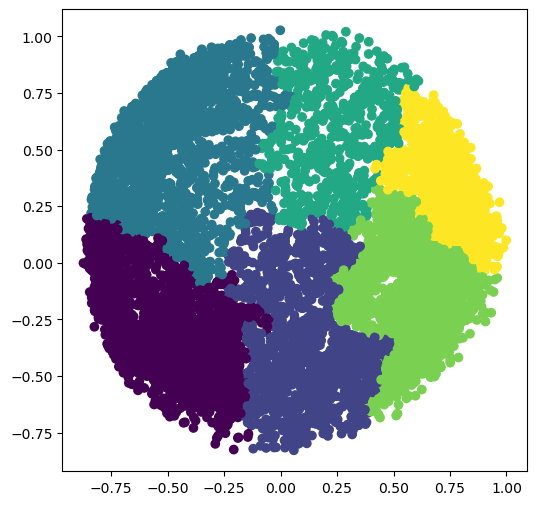

In [20]:
# k = 6
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['P1'],df_principal['P2'], c = ac6.fit_predict(df_principal))
plt.show()

In [26]:
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(df_principal, ac2.fit_predict(df_principal)))
silhouette_scores.append(silhouette_score(df_principal, ac3.fit_predict(df_principal)))
silhouette_scores.append(silhouette_score(df_principal, ac4.fit_predict(df_principal)))
silhouette_scores.append(silhouette_score(df_principal, ac5.fit_predict(df_principal)))
silhouette_scores.append(silhouette_score(df_principal, ac6.fit_predict(df_principal)))
print(silhouette_scores)

[0.4350023993450264, 0.4112442985121089, 0.39376548462264305, 0.3592052971111107, 0.3516171901540786]


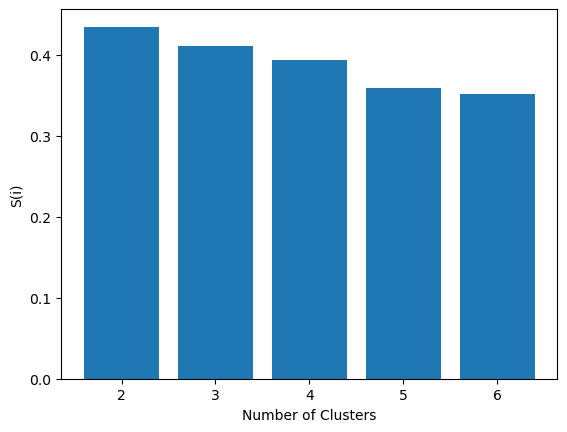

In [27]:
# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6]
plt.bar(k,silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('S(i)')
plt.show()